In [1]:
import argparse
import qp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

Testing the qp code with BPZ p(z) files.  For now I'm using a set of 111k galaxies from the training set, rather than the full ~1 million galaxies.  BPZ format is ID# and then p(z) with the specified numpy.arange, which is given in the header of the file.  Need to strip off the first column with the ID

In [3]:
infile = "/Users/samschmidt/PZPAPER/mystuff/test_magscat_trainingfile_probs.out"
szfile = "/Users/samschmidt/PZPAPER/mystuff/train_justsz.out"
#infile = "/Users/samschmidt/PZPAPER/mystuff/test_magscat_trainingfile_probs_top2000.out"
#szfile = "/Users/samschmidt/PZPAPER/mystuff/train_justsz_top2000.out"
z_array = np.arange(0.0050,2.1100,0.0100) #this is the grid output by BPZ for my runs
z_trues = np.loadtxt(szfile,skiprows=1)
alldata = np.loadtxt(infile,skiprows=1)
ID = alldata[:,0]
pzs = alldata[:,1:]

In [41]:
print len(z_trues)
print len(ID)
print pzs.shape
print np.max(z_trues),np.min(z_trues)

111171
111171
(111171, 211)
2.0 0.016


In [33]:
true_pdf = qp.PDF(samples=z_trues)
#true_pdf.plot()

Interpolating the `samples` parametrization
Creating a `linear` interpolator for the samples parametrization.
Plotted samples


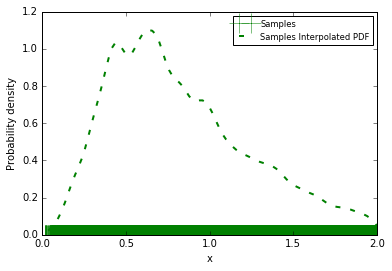

In [34]:
true_pdf.plot()

In [6]:
approx_pdf = qp.Ensemble(pzs.shape[0],gridded=(z_array,pzs))

In [8]:
newarray=np.arange(0.0,2.11,0.05)
print newarray

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15
  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75
  1.8   1.85  1.9   1.95  2.    2.05  2.1 ]


In [ ]:
testme = approx_pdf.evaluate(loc=newarray,using='gridded',vb=True)

In [9]:
sumpdf = approx_pdf.stack(loc=newarray,using='gridded',vb=True)

In [10]:
print sumpdf

{'gridded': (array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
        1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
        1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ]), array([ 0.01295999,  0.08908455,  0.16376229,  0.31879273,  0.46824777,
        0.59435387,  0.69946727,  0.82917602,  0.9597267 ,  0.98509603,
        0.95312299,  0.9558524 ,  1.02892627,  1.04970032,  0.98477439,
        0.87962754,  0.83808471,  0.7805817 ,  0.74136743,  0.70950558,
        0.63578125,  0.56437545,  0.54690489,  0.50211331,  0.47965119,
        0.48051136,  0.479689  ,  0.43845793,  0.35497081,  0.29537442,
        0.25871898,  0.22455989,  0.20101733,  0.18437992,  0.16231699,
        0.14086535,  0.11967744,  0.09863036,  0.07967943,  0.06487586,
        0.05331575,  0.04346378,  0.02464924]))}


In [11]:
xx = sumpdf['gridded']

In [12]:
print xx

(array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
        1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
        1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ]), array([ 0.01295999,  0.08908455,  0.16376229,  0.31879273,  0.46824777,
        0.59435387,  0.69946727,  0.82917602,  0.9597267 ,  0.98509603,
        0.95312299,  0.9558524 ,  1.02892627,  1.04970032,  0.98477439,
        0.87962754,  0.83808471,  0.7805817 ,  0.74136743,  0.70950558,
        0.63578125,  0.56437545,  0.54690489,  0.50211331,  0.47965119,
        0.48051136,  0.479689  ,  0.43845793,  0.35497081,  0.29537442,
        0.25871898,  0.22455989,  0.20101733,  0.18437992,  0.16231699,
        0.14086535,  0.11967744,  0.09863036,  0.07967943,  0.06487586,
        0.05331575,  0.04346378,  0.02464924]))


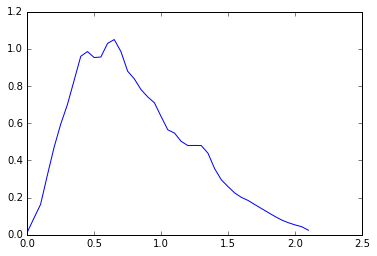

In [13]:
plt.figure()
plt.plot(xx[0],xx[1])

In [16]:
approx_pdf.truth=true_pdf

I was having trouble getting qp.kld working (I'm not quite sure how it's supposed to be used, with a stacked object? If so, I was getting errors), so I just wrote out a gridded form of the summed pdf and created a new PDF object to use in the kld and rmse tests

In [25]:
tmp1 = xx[0]
tmp2 = xx[1]
nz = qp.PDF(gridded=(tmp1,tmp2))

show that the 0 to 2.2 range works for the gridded sumpz object now called nz

In [51]:
farray = np.arange(0.0,2.2,.1)
nze = nz.evaluate(farray)[1]
print nze

Evaluating a `linear` interpolation of the gridded parametrization.
Interpolating the `gridded` parametrization
Creating a `linear` interpolator for the gridded parametrization.
[ 0.01295999  0.16376229  0.46824777  0.69946727  0.9597267   0.95312299
  1.02892627  0.98477439  0.83808471  0.74136743  0.63578125  0.54690489
  0.47965119  0.479689    0.35497081  0.25871898  0.20101733  0.16231699
  0.11967744  0.07967943  0.05331575  0.02464924]


Note that for Samples, we get 'NaN' outside the support of the sampled values (in this case spec-zs cover 0.016<=z<=2.0), so I test the kld and rmse only in 0.1<=z<=1.99

In [52]:
testy = true_pdf.evaluate(farray)[1]
print testy

Evaluating a `linear` interpolation of the samples parametrization.
Interpolating the `samples` parametrization
Creating a `linear` interpolator for the samples parametrization.
[        nan  0.09711605  0.32993069  0.6140675   0.95994594  0.97189214
  1.07872102  1.03532305  0.83366469  0.72414939  0.68432187  0.51097455
  0.43427125  0.39209324  0.35402753  0.26806241  0.22424341  0.17087617
  0.14524172  0.11675096  0.04911792         nan]


In [44]:
F = true_pdf.histogramize(N=500,vb=False)
tmp1 = F[0]
tmp2 = F[1]
fast_true = qp.PDF(histogram = (tmp1,tmp2))

New histograms can only be computed from a truth distribution in this version.


TypeError: 'NoneType' object has no attribute '__getitem__'

Operations with the samples are quite slow, tried making histogram or grid of values to speed things up, but not implemented for samples of true values

In [47]:
finkld = qp.utils.calculate_kl_divergence(true_pdf,nz,limits=(0.1,1.99),dx=0.1,vb=True)

Evaluating a `linear` interpolation of the samples parametrization.
Interpolating the `samples` parametrization
Creating a `linear` interpolator for the samples parametrization.
Evaluating a `linear` interpolation of the gridded parametrization.
Interpolating the `gridded` parametrization
Creating a `linear` interpolator for the gridded parametrization.


In [48]:
print finkld

0.00733038518372


In [49]:
finrmse = qp.utils.calculate_rmse(true_pdf,nz,limits=(0.1,1.99),dx=0.1,vb=True)

Evaluating a `linear` interpolation of the samples parametrization.
Interpolating the `samples` parametrization
Creating a `linear` interpolator for the samples parametrization.
Evaluating a `linear` interpolation of the gridded parametrization.
Interpolating the `gridded` parametrization
Creating a `linear` interpolator for the gridded parametrization.


In [50]:
print finrmse

0.0533383808186


When restricted to the support of the spec-z's, kld and rmse appear to work.  Of course, the values of kld and rmse depend on the grid used to evaluate the samples.  This was just a coarse grid to test whether or not things were working, once I got rid of the NaNs from being outside the range of spec-z's.